# Date ranges

Personal cookbook for dealing with date ranges. YMMV. Comments welcome!

In [1]:
! pip install --quiet pandas numpy seaborn matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First, let's create some synthetic data. This creates a data frame with __date__ and __value__ columns.

In [3]:
number_of_rows = 1000
start_date = '2018-01-01'

data = pd.DataFrame(
    {
        'date': np.datetime64(start_date) + pd.Series(np.random.randint(0, 2*365, number_of_rows)),
        'value': np.random.exponential(10, number_of_rows)
    },

)

We'd like to do some analysis of the values by period. Let's create a new data frame.

In [4]:
period_data = pd.DataFrame(
    data={
        'value': data.value.values
    },
    index=data.date.values
)
# period_data.index = data.date
period_data = period_data.to_period('Q')

periods = pd.period_range(start=period_data.index.min(), end=period_data.index.max()).values

Finally, plot this on a chart

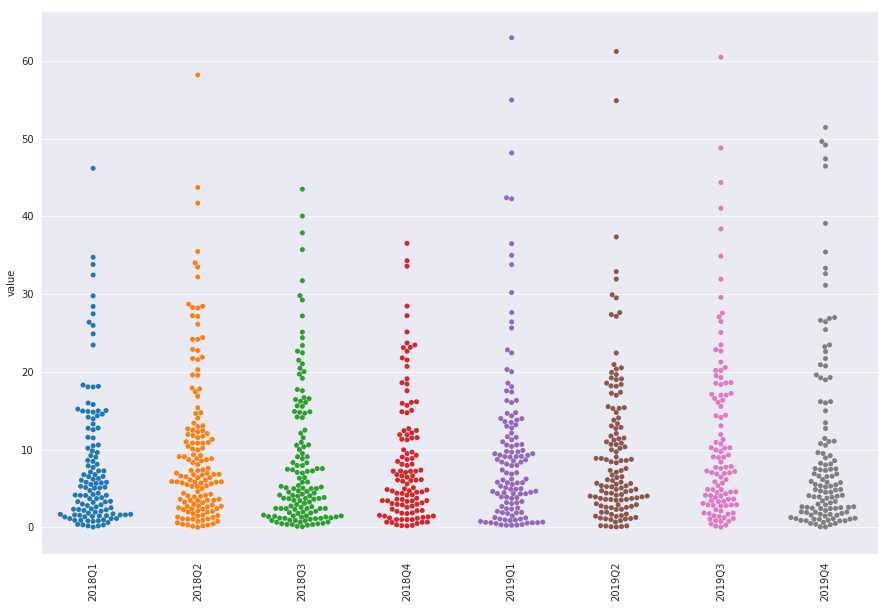

In [5]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(15,10))
    plt.xticks(rotation='vertical')
    sns.swarmplot(data=period_data, x=period_data.index, y=period_data.value, order=periods)